In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

# Probability distributions of random variables

- Normal distribution
- Exponential distribution
- Poisson distribution
- Binomial distribution

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("bmh")
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12

# [SciPy](https://scipy.org/)

### [scipy.stats](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) 

```
conda activate neu365p
pip install scipy
```

In [3]:
import scipy.stats as st

# Normal distribution

**Learning goals**
- You will be able to use scipy.stats to work with normal distributions.
- You will be able to get a continuous distribution's probability density function and plot it.
- You will be able to get a continuous distribution's cummulative density function.
- You will be able to get a continuous distribution's survival function.
- You will be able to get the point corresponding to a given fraction of the distribution.
- You will be able to plot a histogram of data overlaid with a descriptive probability density function.

### Normal distribution example

Under basal conditions the resting membrane voltage of a neuron fluctuates around -70 mV with a variance of 10 mV. You want to model the neuron's resting membrane voltage.

- In this case the **random variable** is the neuron's resting **membrane voltage**.
- You could model the neuron's resting membrane voltage using a **normal distribution** because the data represent random fluctuations about a central mean.

Normal distribution
- mean $\mu$ = -70 mV 
- standard deviation $\sigma$ = $\sqrt{10}$ mV

In [4]:
# These parameters define a normal distribution
# that you will use to model the neuron's resting membrane voltage

mu = -70           # mean resting membrane voltage (mV)
sd = np.sqrt(10)   # standard deviation about the mean (mV)

What is the probability density of observing a resting membrane voltage of -75 mV?

In [5]:
st.norm.pdf(-75, mu, sd)

np.float64(0.03614447853363626)

What is the probability density of observing a resting membrane voltage of -75 or -69 mV?

In [6]:
st.norm.pdf([-75, -69], mu, sd)

array([0.03614448, 0.12000389])

Plot the entire *pdf* between -85 and -55 mV.

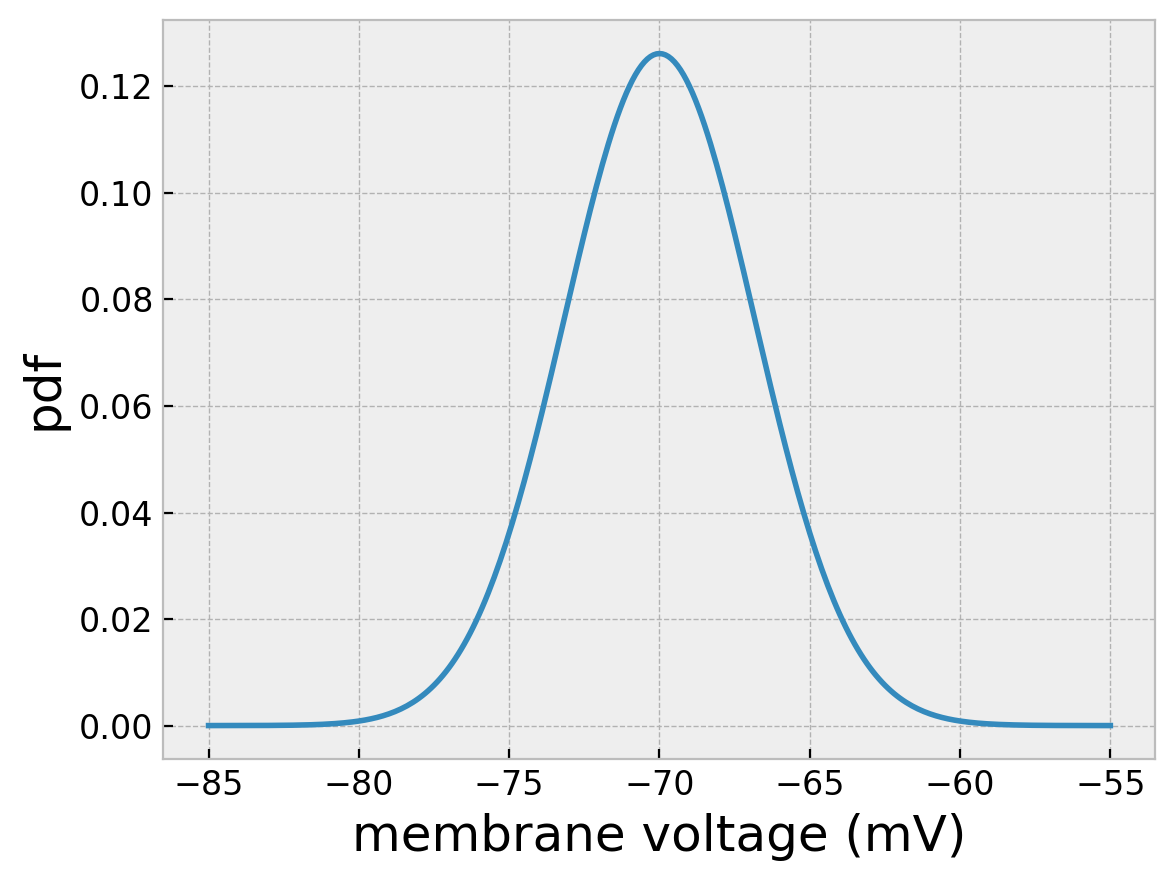

In [7]:
# array of membrane voltages from -85 to -55 mV
mV = np.linspace(-85, -55, 301)

# probability density for each membrane voltage in mV
pdf = st.norm.pdf(mV, mu, sd)

plt.plot(mV, pdf)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf');

What is the probability of observing a resting membrane voltage <= -70 mV?

In [8]:
# cummulative density function (cdf)
st.norm.cdf(-70, mu, sd)

np.float64(0.5)

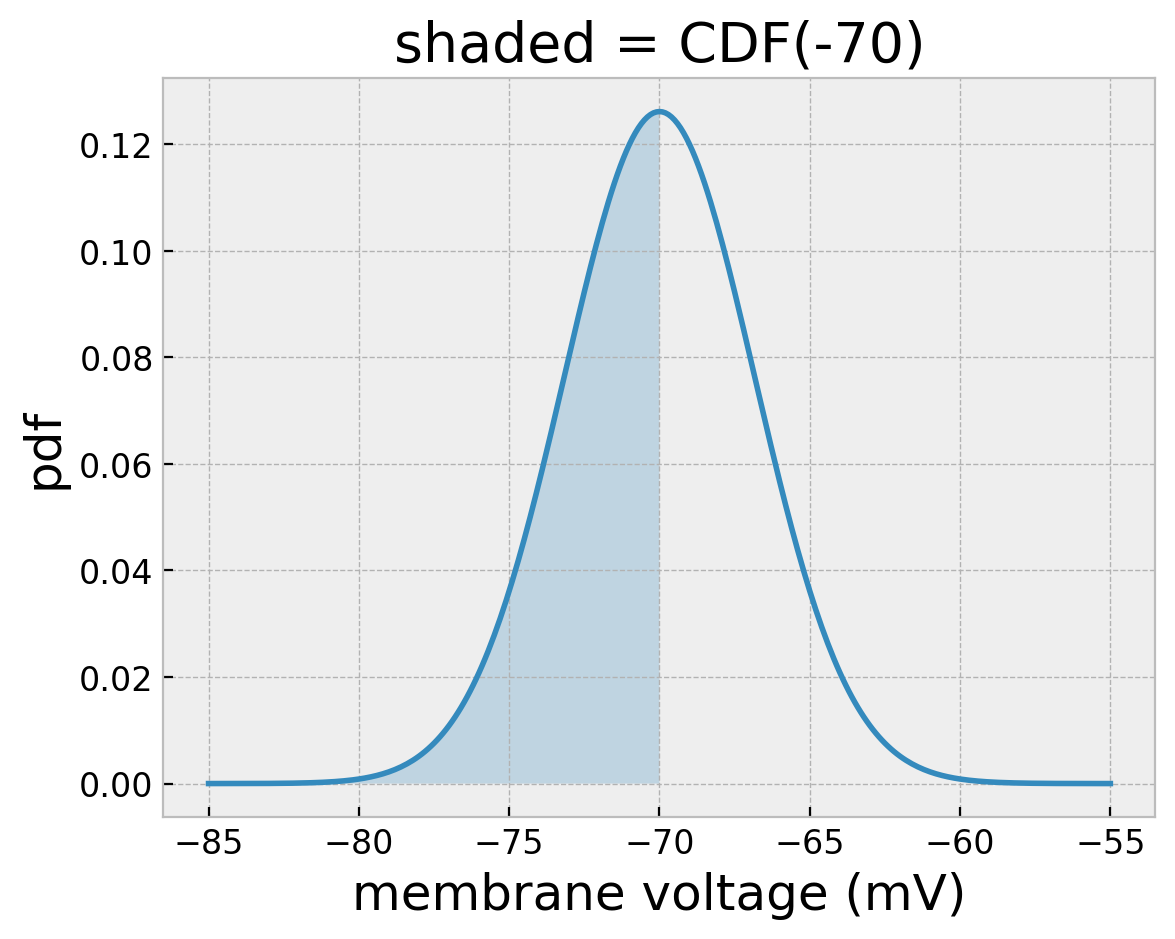

In [9]:
plt.plot(mV, pdf)
mask = (mV <= -70)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.title('shaded = CDF(-70)');

What is the probability of observing a resting membrane voltage > -70 mV?

In [10]:
# survival function (sf)
st.norm.sf(-70, mu, sd)

np.float64(0.5)

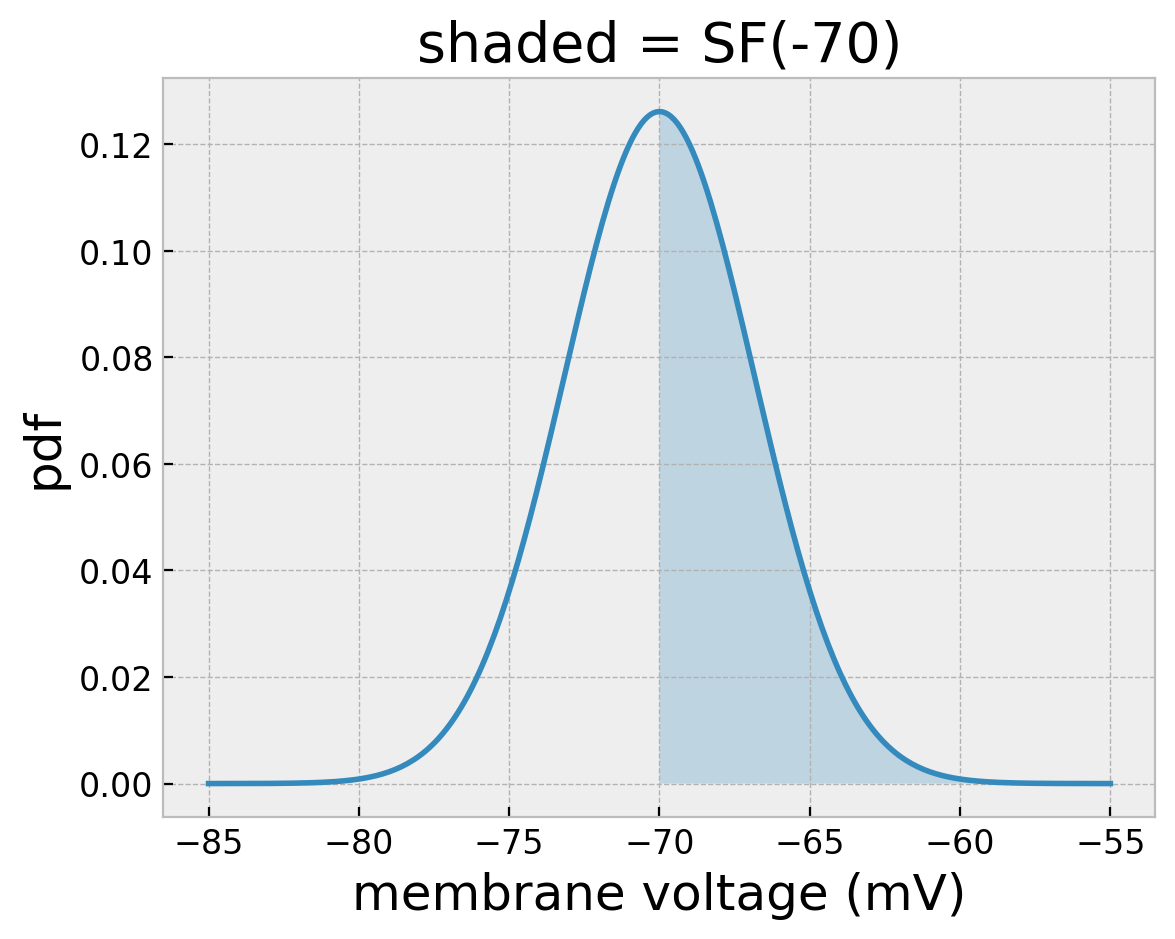

In [11]:
plt.plot(mV, pdf)
mask = (mV >= -70)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.title('shaded = SF(-70)');

What is the probability of observing a resting membrane voltage > -72 mV and <= -67 mV?

In [12]:
st.norm.cdf(-67, mu, sd) - st.norm.cdf(-72, mu, sd)

np.float64(0.5650645159932752)

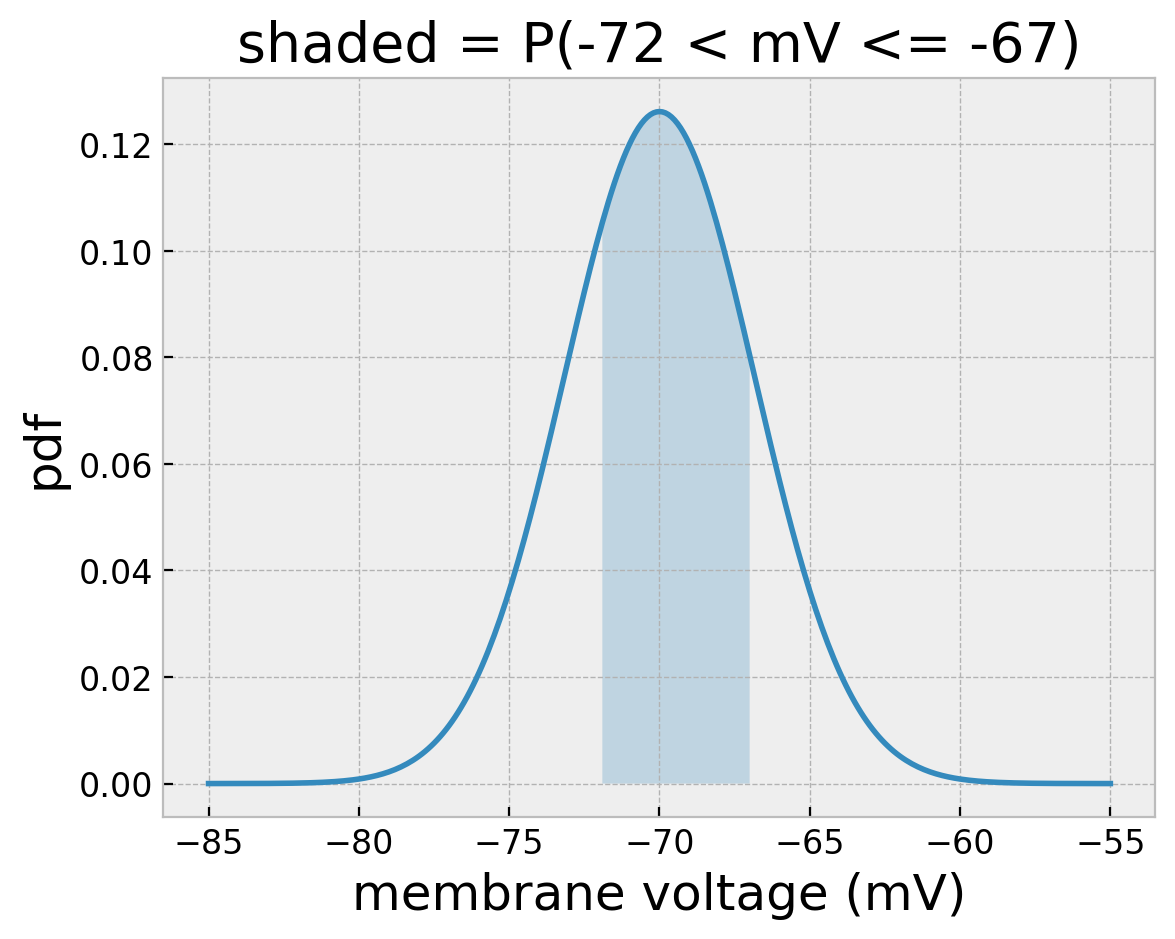

In [13]:
plt.plot(mV, pdf)
mask = (-72 < mV) & (mV <= -67)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.title('shaded = P(-72 < mV <= -67)');

What voltage do we expect 25% of the observations to be equal to or less than?

In [14]:
# percent point funciton (ppf)
st.norm.ppf(0.25, mu, sd)

np.float64(-72.13292386905762)

In [15]:
V25 = st.norm.ppf(0.25, mu, sd)

st.norm.cdf(V25, mu, sd)

np.float64(0.25)

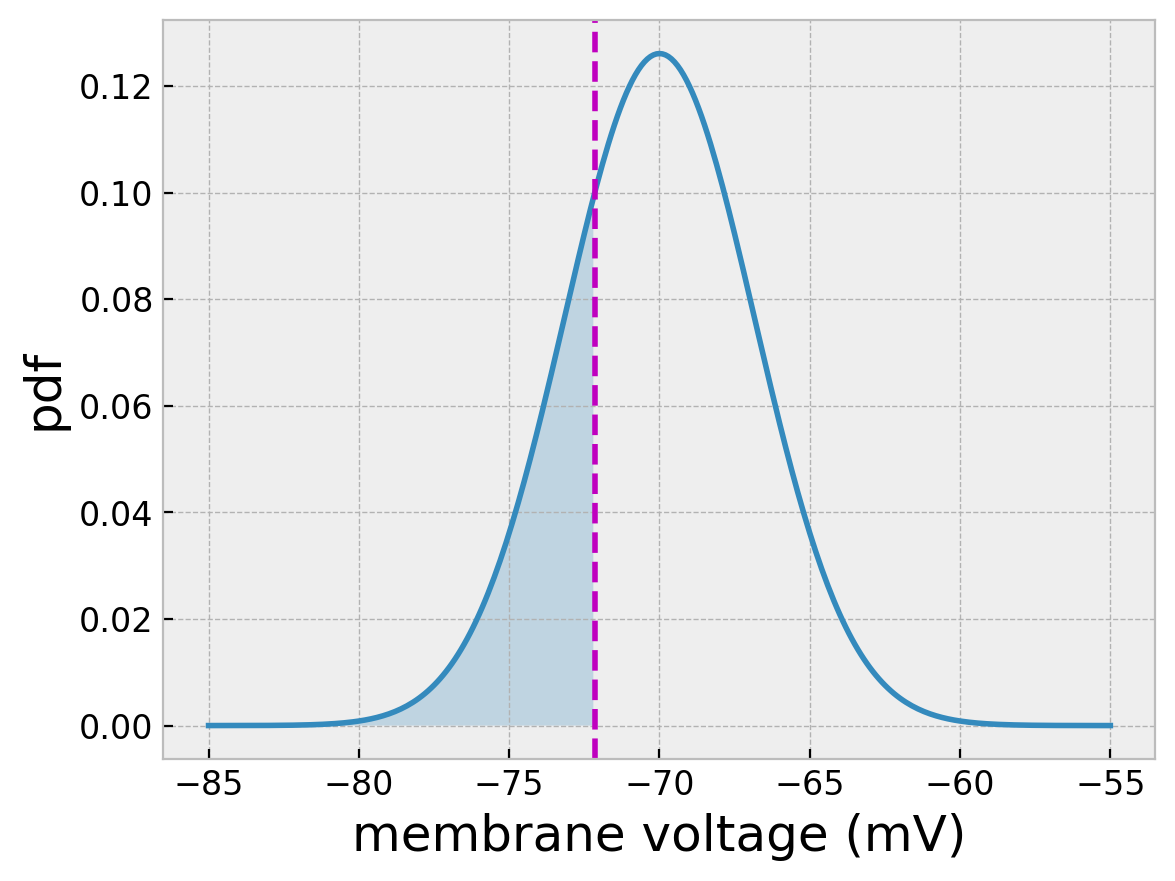

In [16]:
plt.plot(mV, pdf)
plt.axvline(V25, ls='--', color='m')
mask = (mV <= V25)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf');

What voltage range includes the central 95% of expected observations?

In [17]:
# first 2.5% and 97.5% of distribution
low, high = st.norm.ppf([0.025, 0.975], mu, sd)

print(f"95% of membrane voltages are expected to fall within {low :.1f} mV and {high :.1f} mV.")

95% of membrane voltages are expected to fall within -76.2 mV and -63.8 mV.


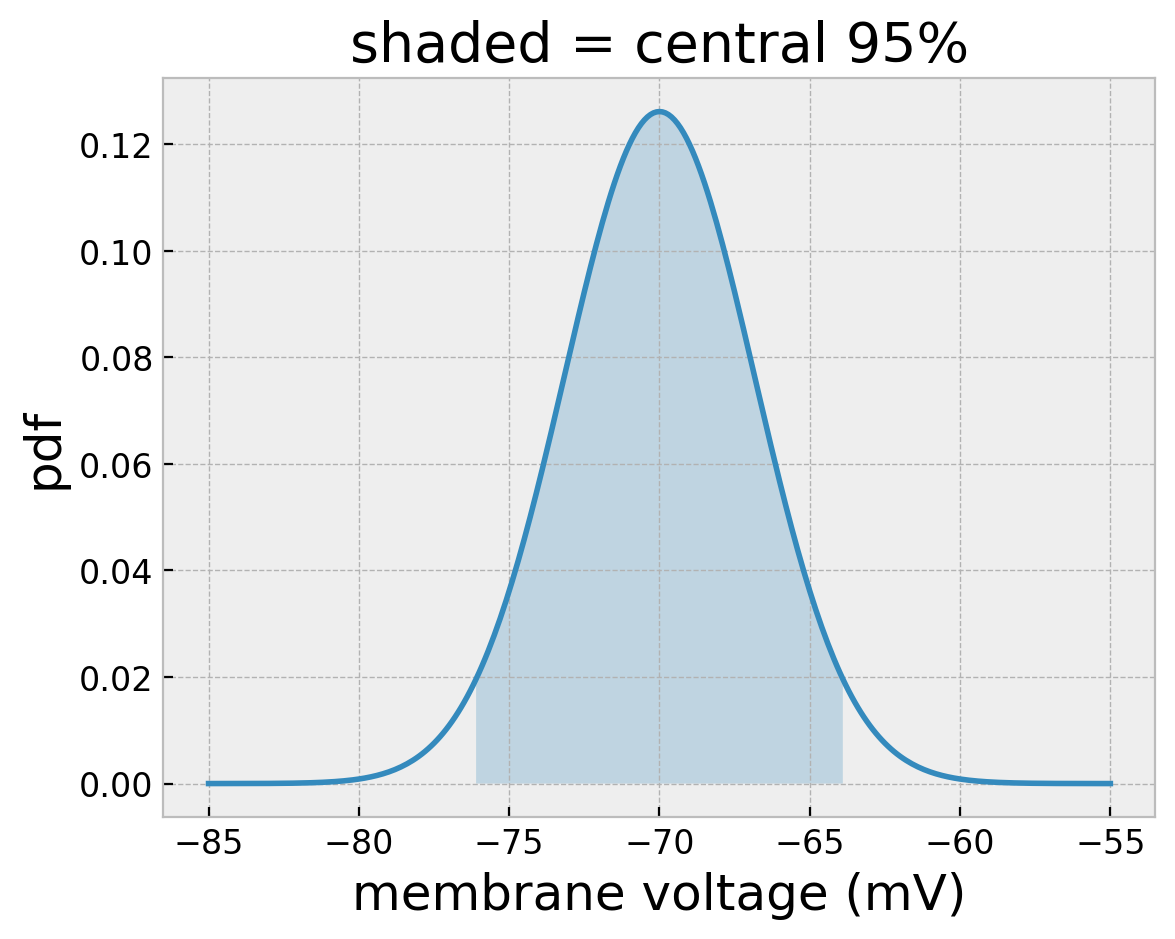

In [18]:
plt.plot(mV, pdf)
mask = (mV >= low) & (mV <= high)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.title('shaded = central 95%');

You can draw random sample values from your distribution.

In [19]:
rand_samples = st.norm.rvs(mu, sd, size=5)
rand_samples

array([-78.40307816, -68.93674325, -70.41756598, -69.3424565 ,
       -64.45462733])

In [20]:
rand_samples = st.norm.rvs(mu, sd, size=[2,3])
rand_samples

array([[-70.20049684, -70.07276455, -71.98097024],
       [-72.93838709, -72.03965969, -70.03806836]])

Consider a simulated data sample for measurements of this neuron's resting membrane voltage.

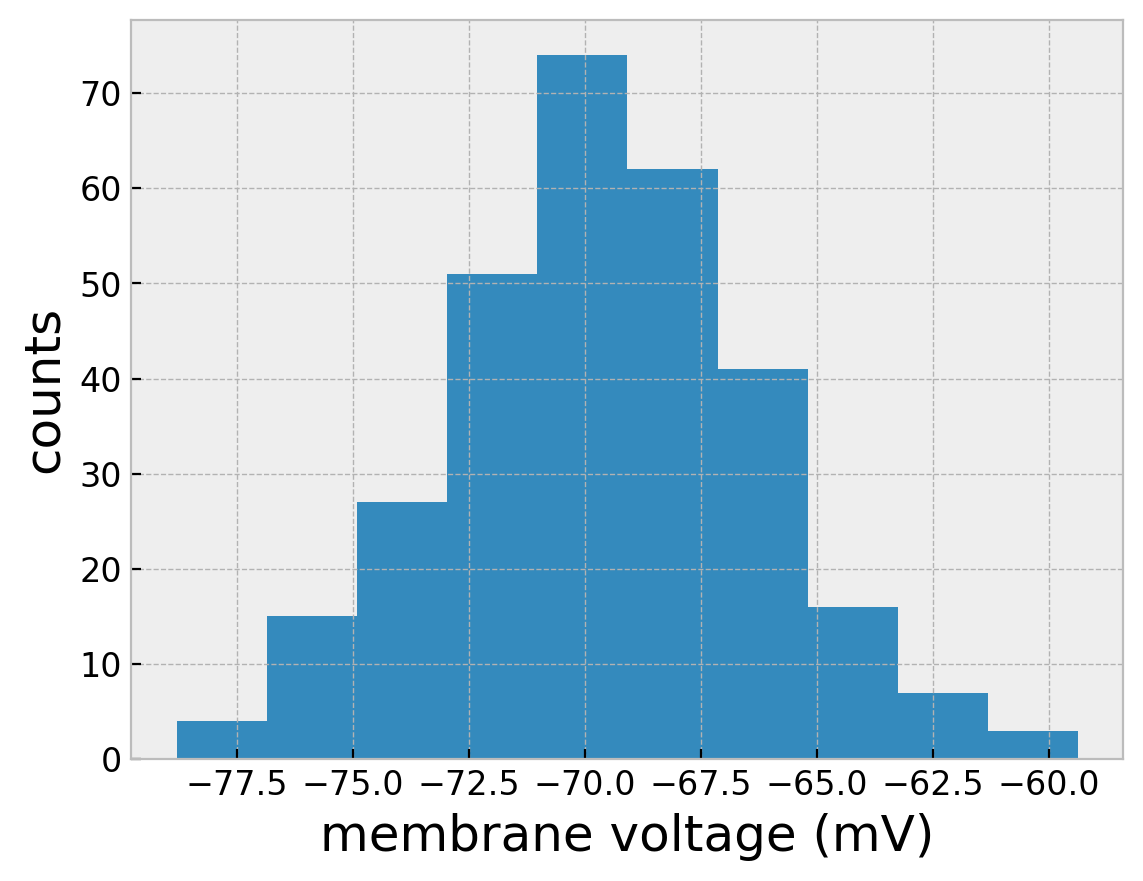

In [21]:
# simulated data for this neuron's resting membrane voltage
data = st.norm.rvs(mu, sd, size=300)

plt.hist(data)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('counts');

Overlaying a PDF on a data histogram **does not make sense** as the units don't match *(counts vs. probability density)*.

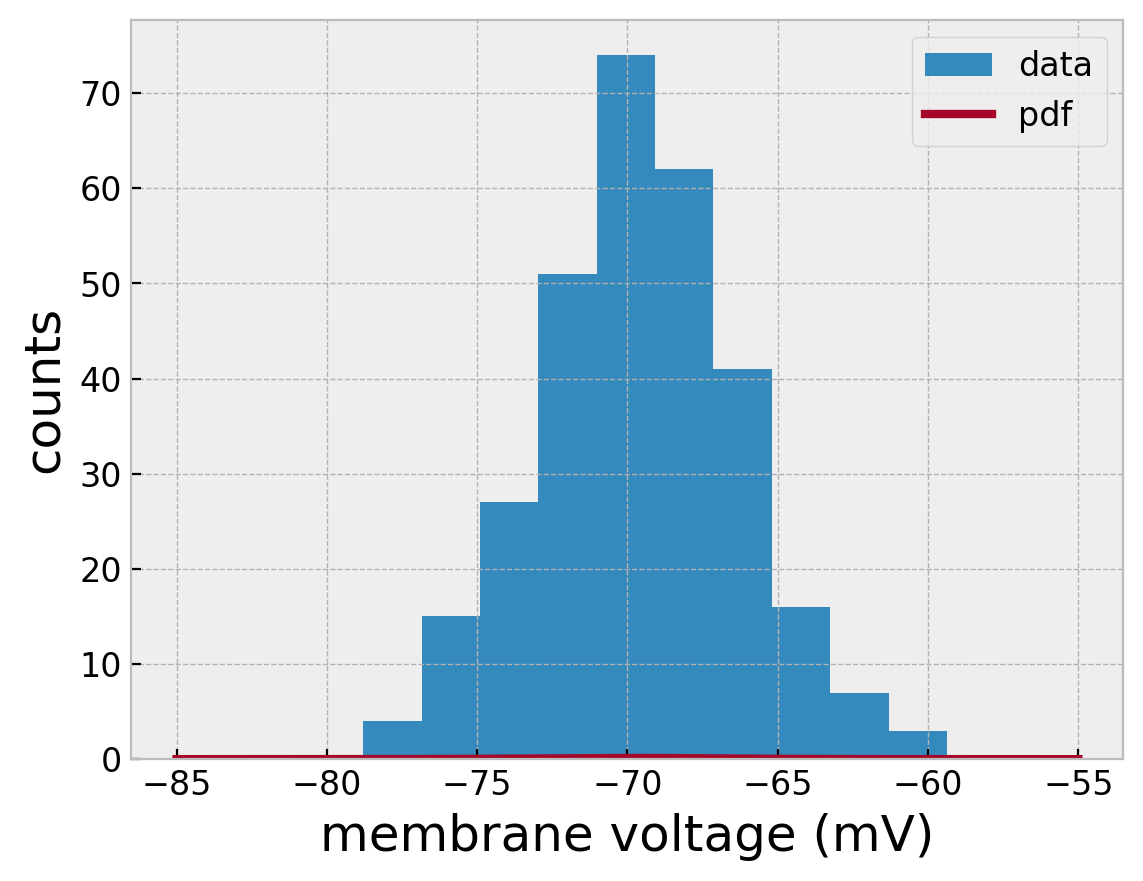

In [22]:
plt.hist(data, label='data')
plt.plot(mV, pdf, lw=3, label='pdf')
plt.xlabel('membrane voltage (mV)')
plt.ylabel('counts')
plt.legend();

The counts histogram must be scaled so that it has **unit area** if you want to directly compare it with a probability distribution.

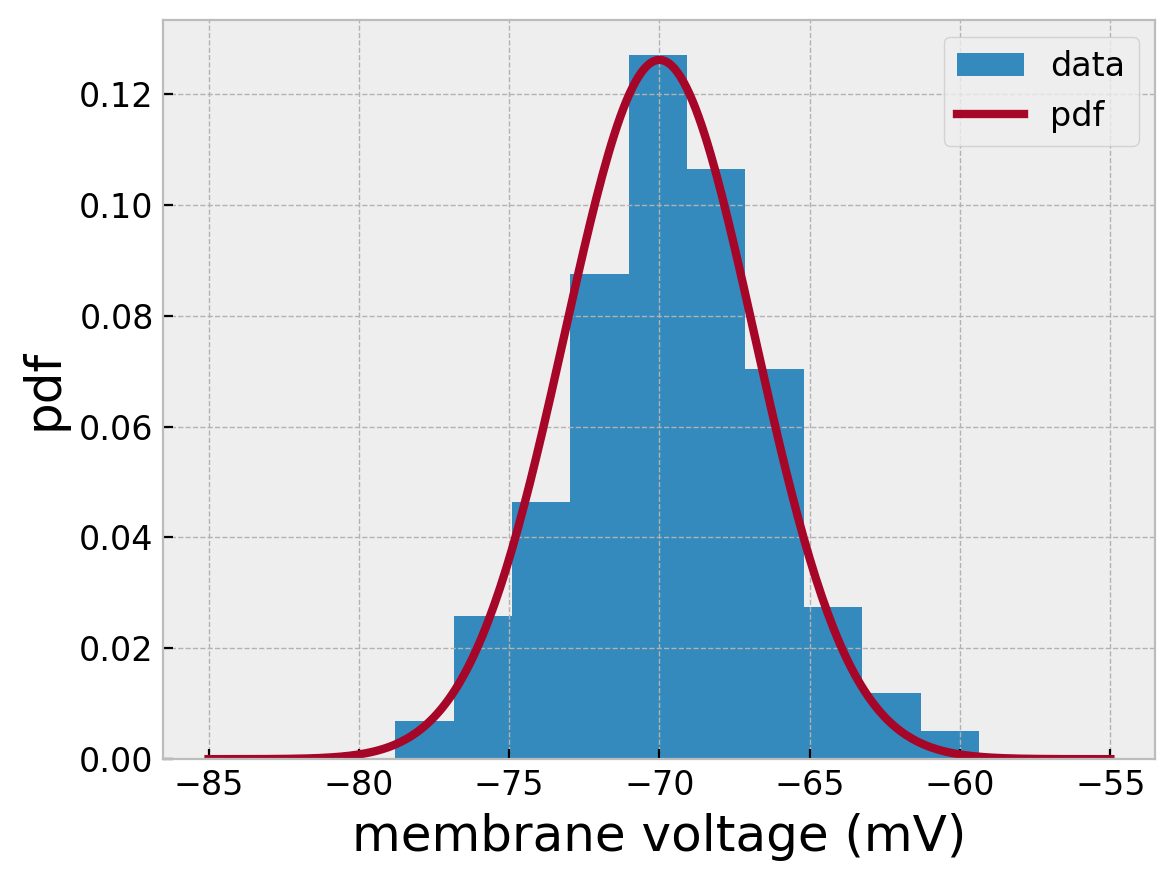

In [23]:
plt.hist(data, label='data', density=True)
plt.plot(mV, pdf, lw=3, label='pdf')
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.legend();

Note that changing your histograms binning **DOES NOT CHANGE THE UNDERLYING DATA OR THE PDF**, just how you view it.

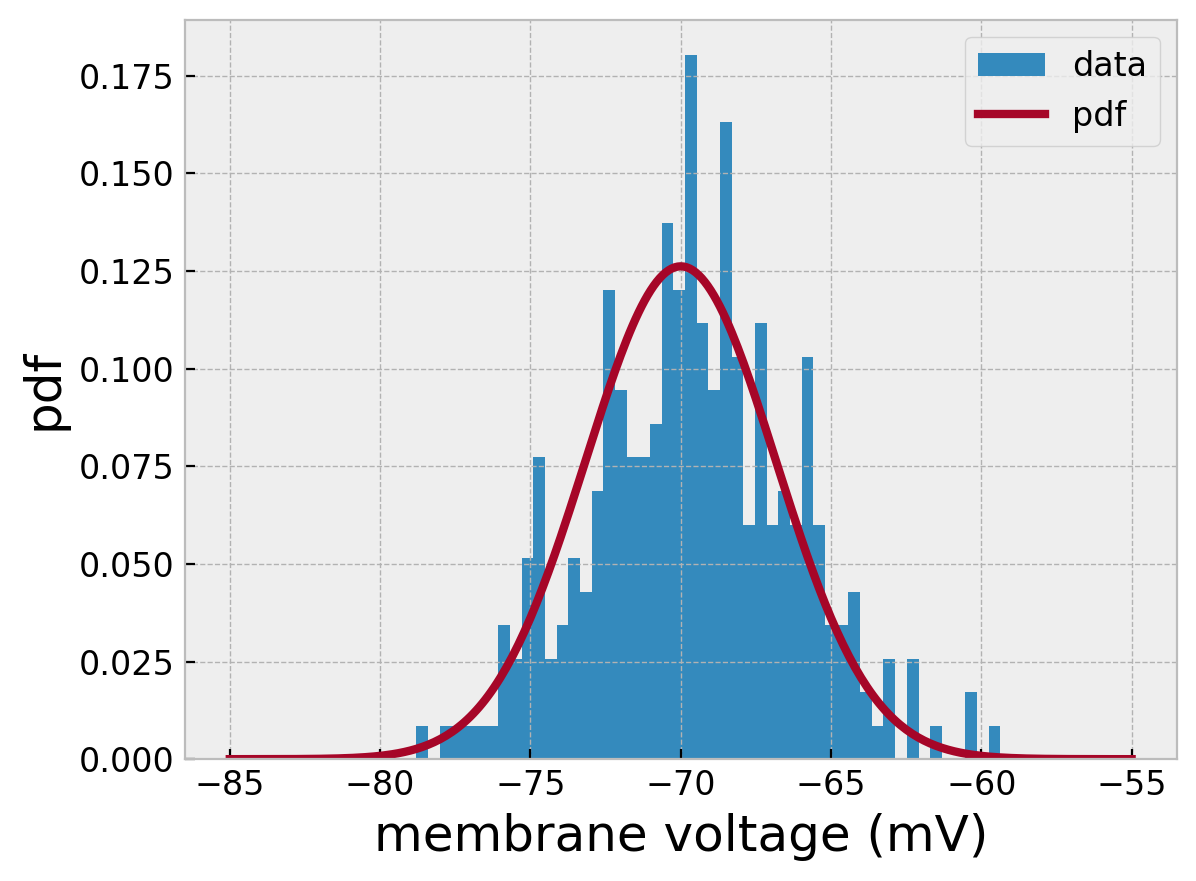

In [24]:
plt.hist(data, 50, label='data', density=True)
plt.plot(mV, pdf, lw=3, label='pdf')
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.legend();

# Exponential distribution
**Learning goals**
- You will be able to use scipy.stats to work with exponential distributions.
- You will understand that an exponential distribution is completely defined by its mean.

### Exponential distribution example

A neuron spikes 1.5 times per second on average. You want to know the probability that less than 0.5 seconds will separate a pair of spikes.

- In this case the **random variable** is the **inter-spike interval time**.
- You could model the inter-spike intervals using an **exponential distribution** because the data represent random fluctuations in the time between events occuring at an average rate.

Exponential distribution
- rate $\lambda$ = 1.5 spikes/sec

In [25]:
rate = 1.5  # (/s)

The mean of an exponential distribution is just the inverse of the rate.
- mean interval $\mu = 1 / \lambda$

In [26]:
mu = 1 / rate

Plot the probability density function of interspike intervals from zero to five seconds with a resolution of 0.01 seconds.

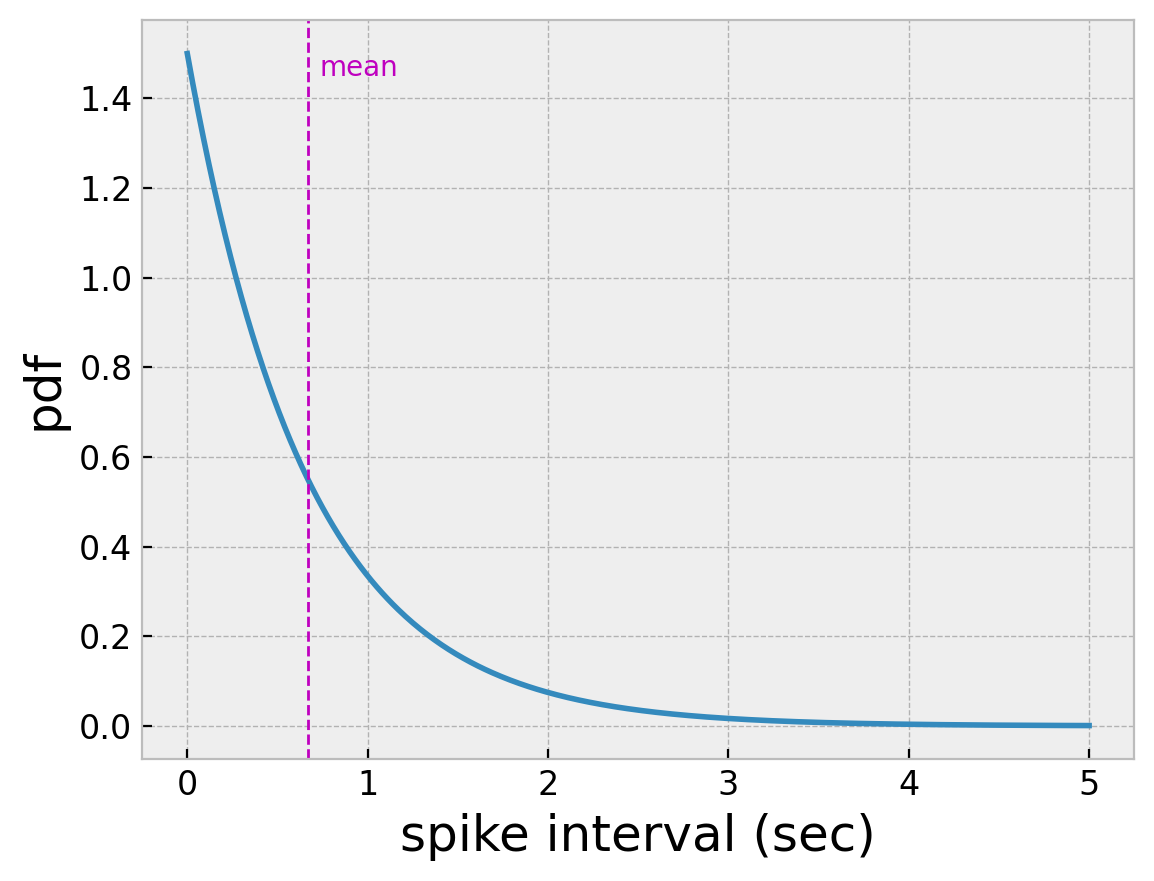

In [27]:
# spike intervals from 0-5 seconds at 0.01 sec resolution
intervals = np.linspace(0, 5, 501)

# exponential pdf for spike intervals
pdf = st.expon.pdf(intervals, 0, mu)

plt.plot(intervals, pdf)
plt.axvline(mu, ls='--', lw=1, color='m')
plt.text(1.1 * mu, 1.45, 'mean', color='m')
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf');

What is the probability that an interval will be between 1 and 2 seconds?

In [28]:
prob1to2 = st.expon.cdf(2, 0, mu) - st.expon.cdf(1, 0, mu)

print(f"Probability of a spike interval being between 1 and 2 seconds is {prob1to2:.2f}")

Probability of a spike interval being between 1 and 2 seconds is 0.17


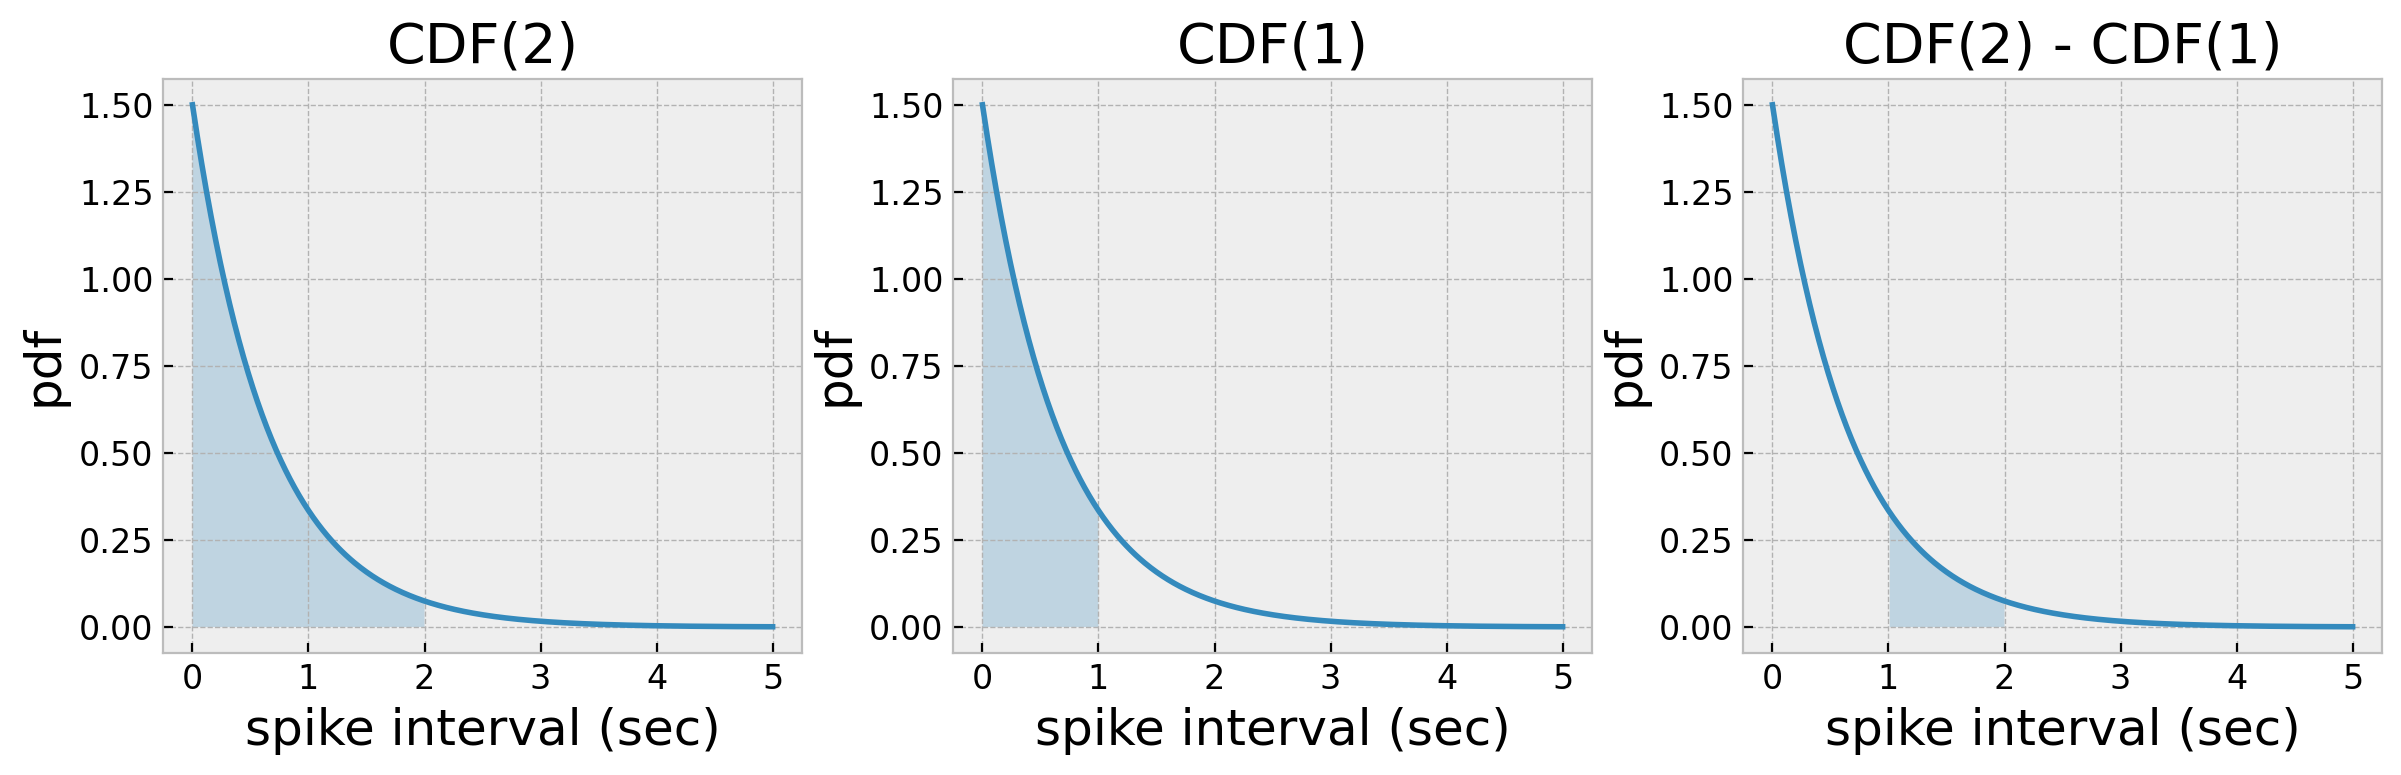

In [29]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 3, 1)
plt.plot(intervals, pdf)
x = intervals[intervals <= 2]
plt.fill_between(x, np.zeros(x.shape), st.expon.pdf(x, 0, mu), alpha=0.25)
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(2)')

plt.subplot(1, 3, 2)
plt.plot(intervals, pdf)
x = intervals[intervals <= 1]
plt.fill_between(x, np.zeros(x.shape), st.expon.pdf(x, 0, mu), alpha=0.25)
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(1)')

plt.subplot(1, 3, 3)
plt.plot(intervals, pdf)
x = intervals[(intervals <= 2) & (intervals > 1)]
plt.fill_between(x, np.zeros(x.shape), st.expon.pdf(x, 0, mu), alpha=0.25)
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(2) - CDF(1)')

plt.tight_layout();

# Exercise

For the above example, what is the probability that at least 3 seconds will pass without any spikes?

In [30]:
# mean spike interval
mu = 1 / rate

# prob = ...

# print(f"There is a {prob * 100 :.2f}% chance that three seconds will pass without a spike.")

# Exercise Key

For the above example, what is the probability that at least 3 seconds will pass without any spikes?

In [31]:
# mean spike interval
mu = 1 / rate

prob = st.expon.sf(3, 0, mu)

print(f"There is a {prob * 100 :.2f}% chance that three seconds will pass without a spike.")

There is a 1.11% chance that three seconds will pass without a spike.


Imagine you recorded spike intervals from a neuron and your observed intervals are given below in the `data` variable.

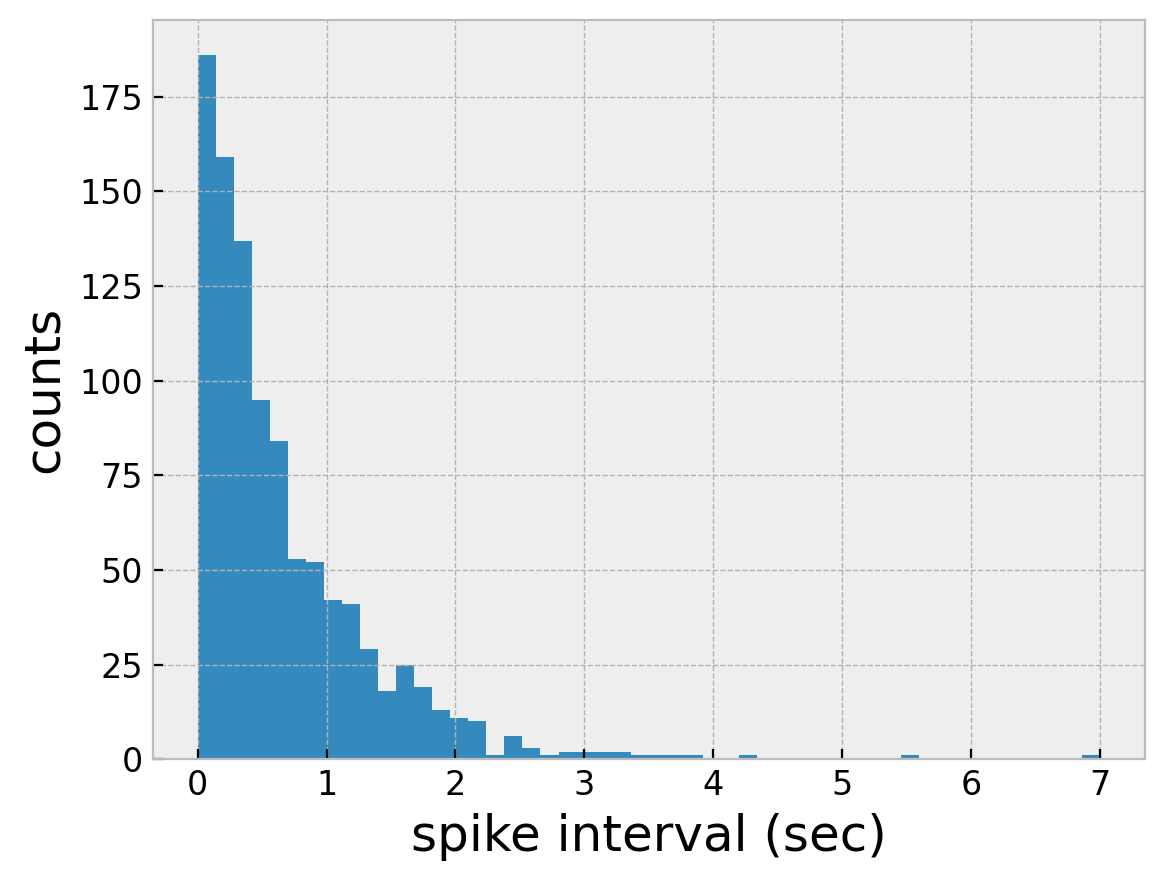

In [32]:
# simulated spike intervals
data = st.expon.rvs(0, mu, size=1000)

plt.hist(data, 50)  # <-- !!! Default histogram binning is not always the best.
plt.xlabel('spike interval (sec)')
plt.ylabel('counts');

Your best estimate for the *exponential distribution* that describes these data is defined by the *mean of the dataset*.

In [33]:
# estimated exponential distribution parameters from data
estimated_rate = 1 / data.mean()

estimated_pdf = st.expon.pdf(intervals, 0, data.mean())

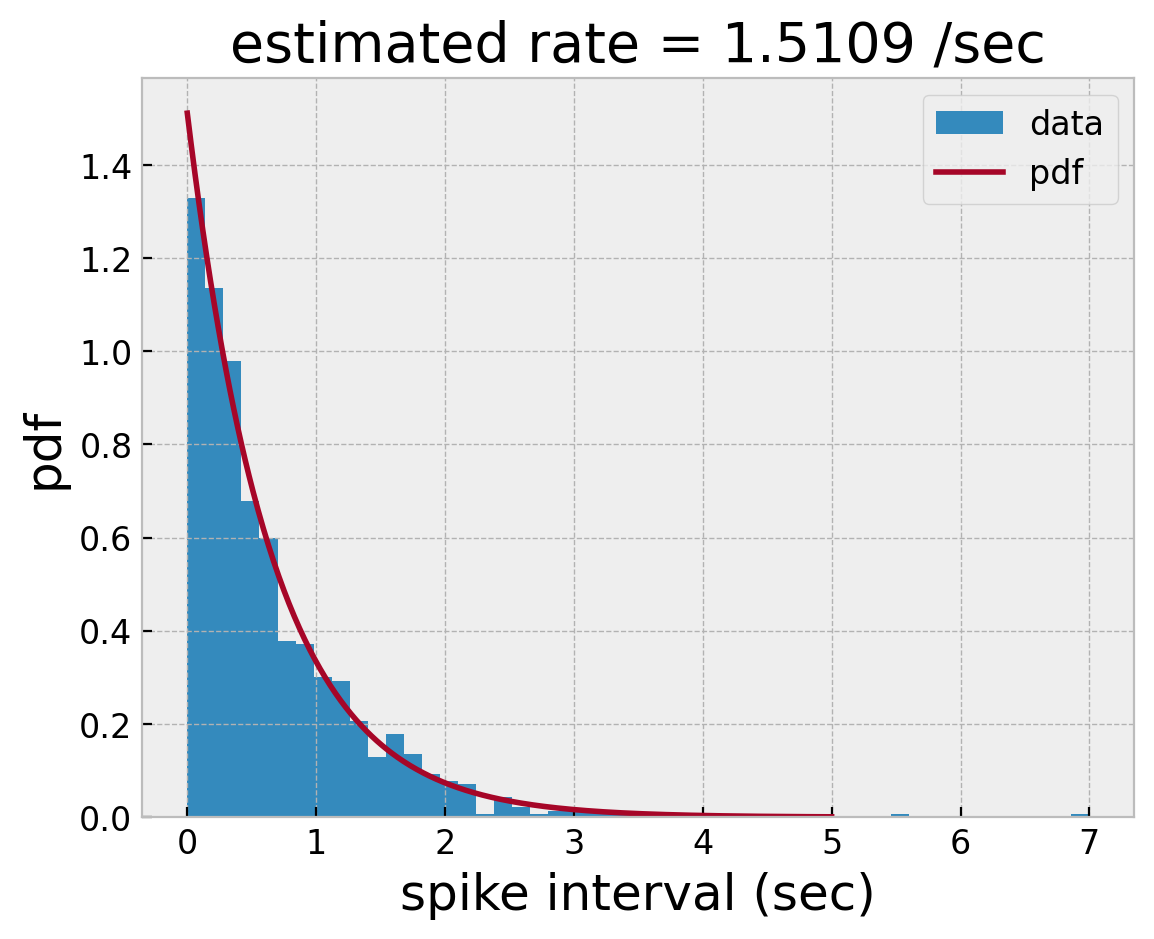

In [34]:
plt.hist(data, 50, label='data', density=True)
plt.plot(intervals, estimated_pdf, label='pdf')
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title(f'estimated rate = {estimated_rate:.4f} /sec')
plt.legend();

Given the above data, within what interval do you expect 90% of spikes t occur?

Which `st.expon.?` function would you use to compute this?

In [35]:
st.expon.ppf(0.9, 0, data.mean())

np.float64(1.5239658537219969)

In [36]:
np.quantile(data, 0.9)

np.float64(1.5817973573021802)

Why do we get slightly different results with `st.expon.ppf` and `np.quantile`?

`np.quantile` is based on the data points themselves, not the fitted distribution that `st.expon.ppf` is based on.

If you exclude both the fastest 2.5% and slowest 2.5%, between what times do you expect 95% of spike intervals to occur?

In [37]:
st.expon.ppf([0.025, 0.975], 0, data.mean())

array([0.01675659, 2.44148472])

In [38]:
np.quantile(data, [0.025, 0.975])

array([0.01123726, 2.28942071])

# Poisson distribution
**Learning goals**
- You will be able to use scipy.stats to work with poisson distributions.
- You will understand that a poisson distribution is completely defined by its mean.
- You will be able to plot a discrete probability distribution as a bar plot.

### Poisson distribution example

Assume that the rate of deleterious mutations is ~1.2 per diploid genome (i.e., per individual). You want to know the probability that a given individual will have a certain number of mutations.

- In this case the **random variable** is the **number of deleterious mutations per individual**.
- You could model this variable using a **poisson distribution** because the data represent discrete numbers of mutations per individual with mutations occuring at an average rate.

Poisson distribution

- rate $\lambda$ = 1.2 mutations per individual

In [39]:
rate = 1.2  # average rate of deleterious mutations per diploid genome

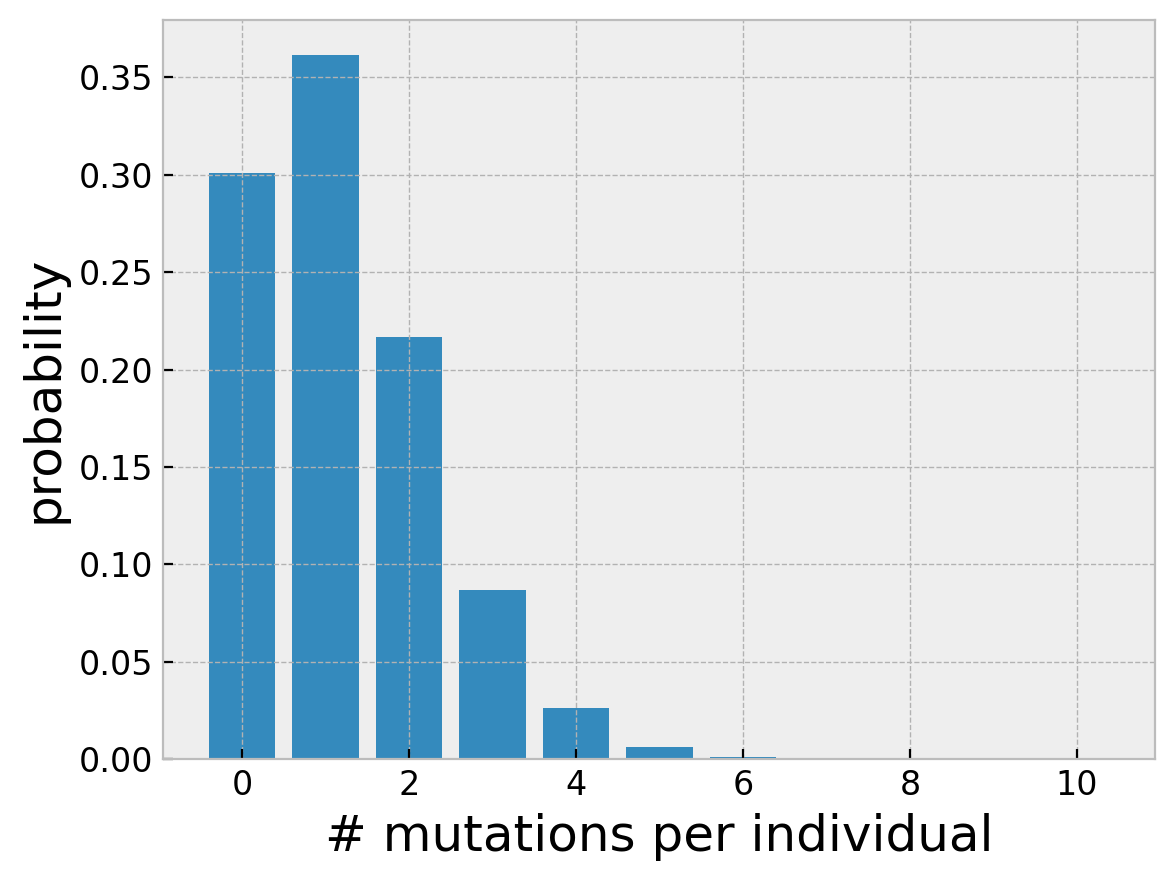

In [40]:
# let's look at the probability for 0-10 mutations
n_mutations = np.arange(11)

# probability (mass function) for each number of mutations from 0-10
pmf = st.poisson.pmf(n_mutations, rate)

plt.bar(n_mutations, pmf)
plt.xlabel('# mutations per individual')
plt.ylabel('probability');

What is the probability that an individual has 4 or more spontaneous deleterious mutations?

Any ideas on how to compute this?

In [41]:
p_less_than_4 = pmf[:4].sum()
p_4_or_more = pmf[4:].sum()

print(f"Probability of less than 4 mutations = {p_less_than_4}")
print(f"Probability of 4 or more mutations = {p_4_or_more}")

Probability of less than 4 mutations = 0.9662310318143444
Probability of 4 or more mutations = 0.03376890594947258


In [42]:
print(f"Probability of less than 4 mutations = {st.poisson.cdf(3, rate)}")
print(f"Probability of 4 or more mutations = {st.poisson.sf(3, rate)}")

Probability of less than 4 mutations = 0.9662310318143443
Probability of 4 or more mutations = 0.03376896818565569


Consider measuring the number of deleterious mutations in 1000 individuals (see `data` below).

In [43]:
# simulated numbers of mutations from subjects
data = st.poisson.rvs(rate, size=1000)

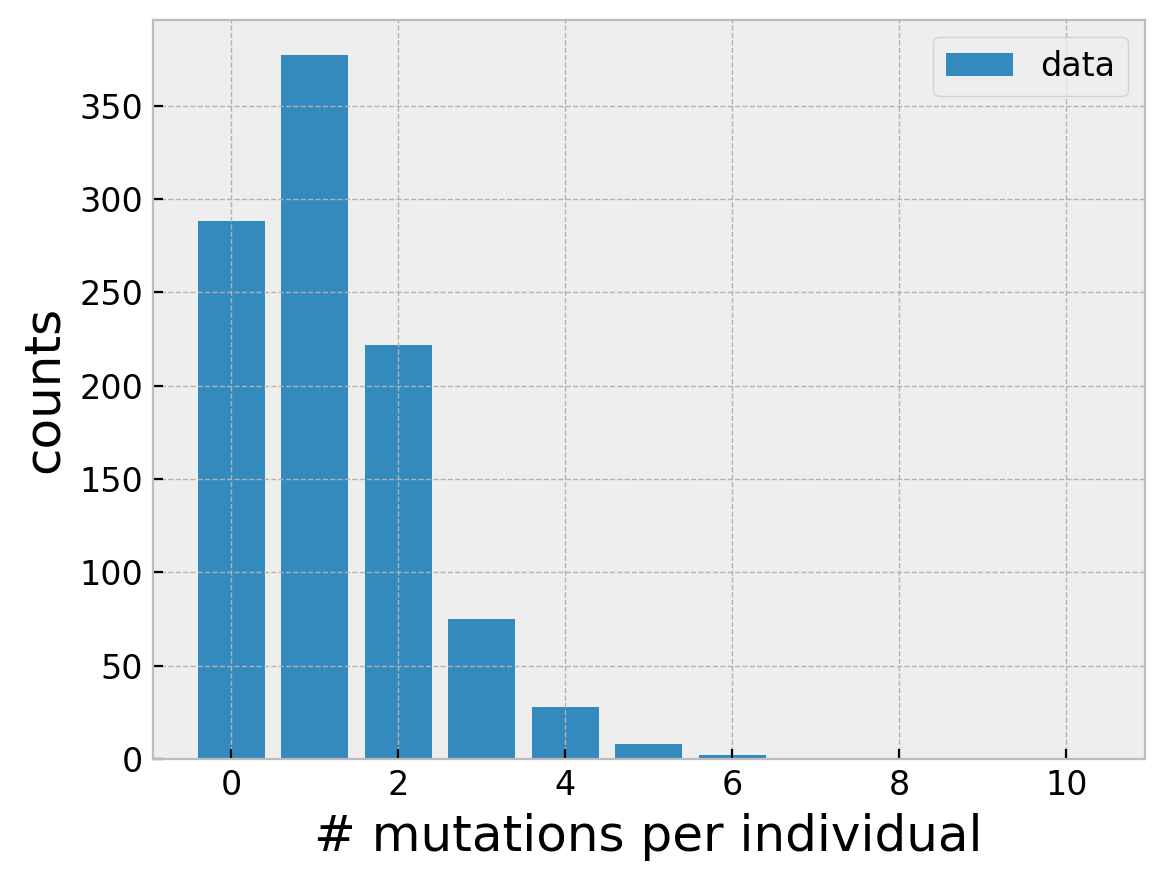

In [44]:
bin_edges = np.arange(12) - 0.5  # bin centers = 0 ... 10
bin_centers = bin_edges[:-1] + 0.5  # 0 ... 10

counts, bin_edges = np.histogram(data, bin_edges)

plt.bar(bin_centers, counts, label='data')
plt.xlabel('# mutations per individual')
plt.ylabel('counts')
plt.legend();

Your best estimate of the average mutation rate is just the mean number of mutations per individual.

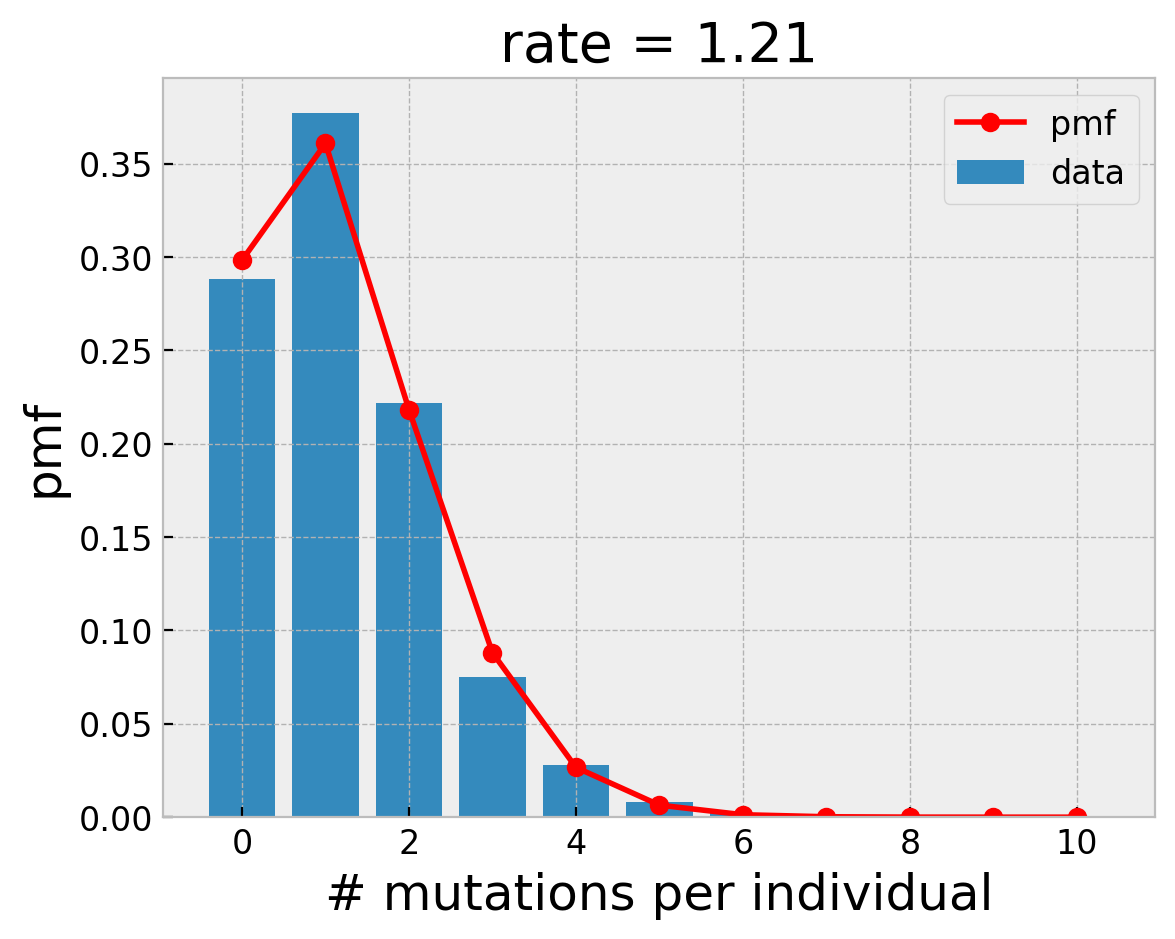

In [45]:
estimated_rate = data.mean()

estimated_pmf = st.poisson.pmf(bin_centers, estimated_rate)

plt.bar(bin_centers, counts / len(data), label='data')
plt.plot(bin_centers, estimated_pmf, 'o-', c='r', label='pmf')
plt.xlabel('# mutations per individual')
plt.ylabel('pmf')
plt.title(f'rate = {estimated_rate:.2f}')
plt.legend();

# Binomial distribution
**Learning goals**
- You will be able to use scipy.stats to work with binomial distributions.

### Binomial distribution example

A couple, who are both carriers for a recessive disease, wish to have 5 children. They want to know the probability that they will have at least four healthy children.

- In this case the **random variable** is the **whether or not a child has the disease**.
- You could model this variable using a **binomial distribution** because it represents a true/false (yes/no) condition repeated independently over multiple children.

Binomial distribution
- number of trials (children): $n = 5$
- probability that each child is healthy: $p = 1 - 0.5 * 0.5 = 0.75$

In [46]:
n = 5  # total number of children
p = 0.75  # probability that each child is healthy = 1 - 0.5 * 0.5 = 0.75

What is the probability that exactly 4 of the 5 children will be healthy?

In [47]:
st.binom.pmf(4, n, p)

np.float64(0.39550781250000006)

What is the probability of each possible number of healthy children?

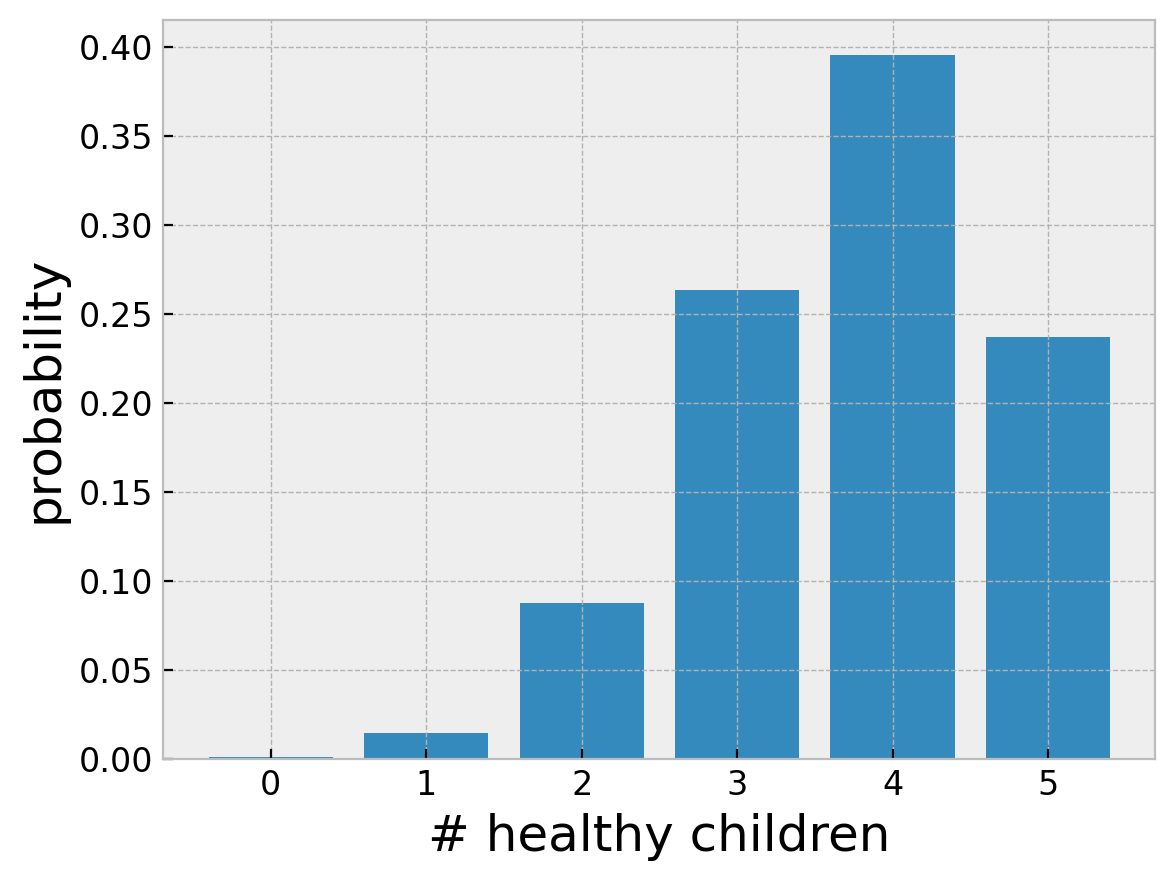

In [48]:
n_children = np.arange(6)

pmf = st.binom.pmf(n_children, n, p)

plt.bar(n_children, pmf)
plt.xlabel('# healthy children')
plt.ylabel('probability');

What is the probability that at least 4 children will be healthy?

In [49]:
st.binom.sf(3, n, p)

np.float64(0.6328125)

In [50]:
1 - st.binom.cdf(3, n, p)

np.float64(0.6328125)

In [51]:
pmf[4:].sum()

np.float64(0.6328125)

What is the mean expected number of healthy children?

$\mu = \sum{X * P(X)}$

In [52]:
mu = (n_children * pmf).sum()
mu

np.float64(3.75)

The probability $p$ in a *binomial distribution* can be derived from the number of trials $n$ and the distribution *mean*.

In [53]:
mu / n

np.float64(0.75)

In [54]:
mu / n == p

np.True_

Imagine you collected data from 50 couples with 5 children each, where each couple were all carriers for this recessive disease.

You store the number of healthy children without the disease (out of 5 children total) for each couple in the `data` variable below.

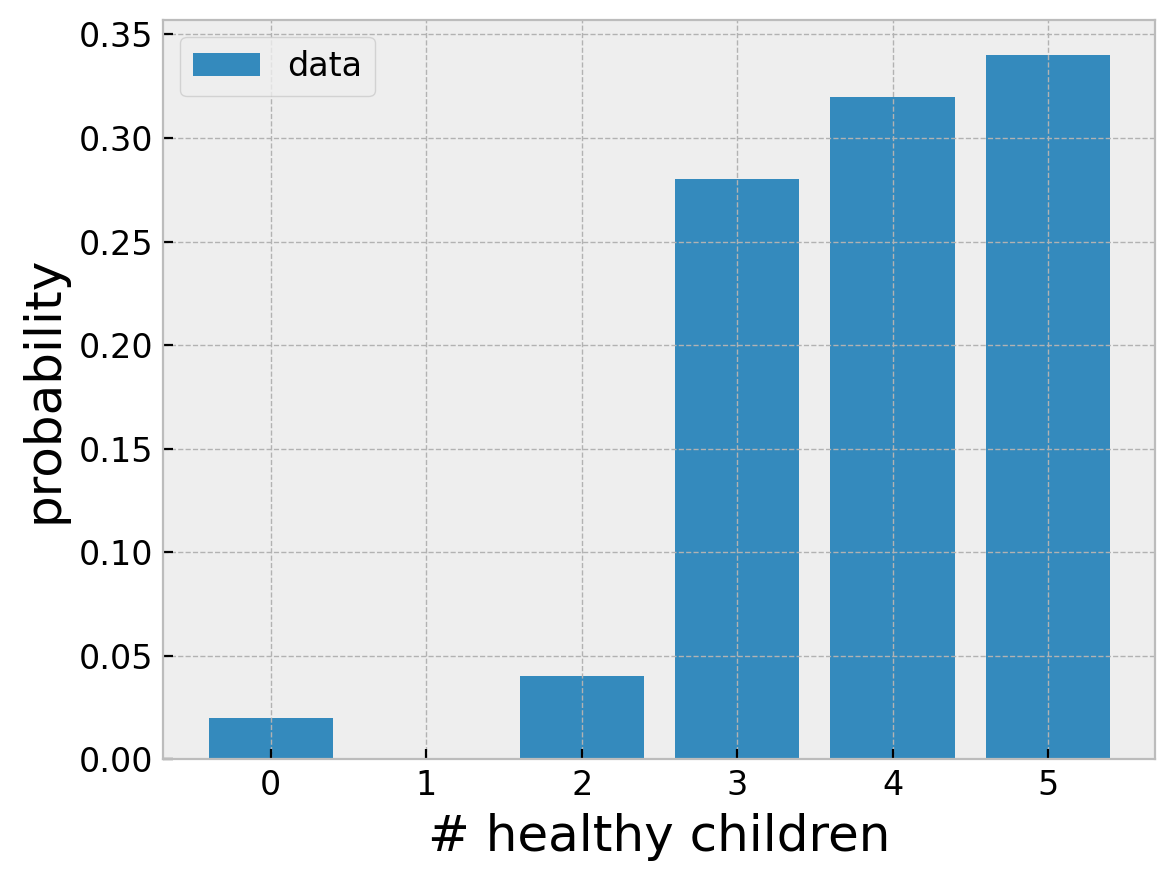

In [55]:
n = 5
p = 0.75

# simulated numbers of healthy children (out of 5) from sampled couples who are carriers
data = st.binom.rvs(n, p, size=50)

bin_edges = np.arange(n+2) - 0.5
counts, bin_edges = np.histogram(data, bin_edges)

n_children = np.arange(n+1)
plt.bar(n_children, counts / len(data), label='data')
plt.xlabel('# healthy children')
plt.ylabel('probability')
plt.legend();

From the data, what is your best estimate for the probability that a given child will be healthy?

In [56]:
estimated_p = data.mean() / n
estimated_p

np.float64(0.78)

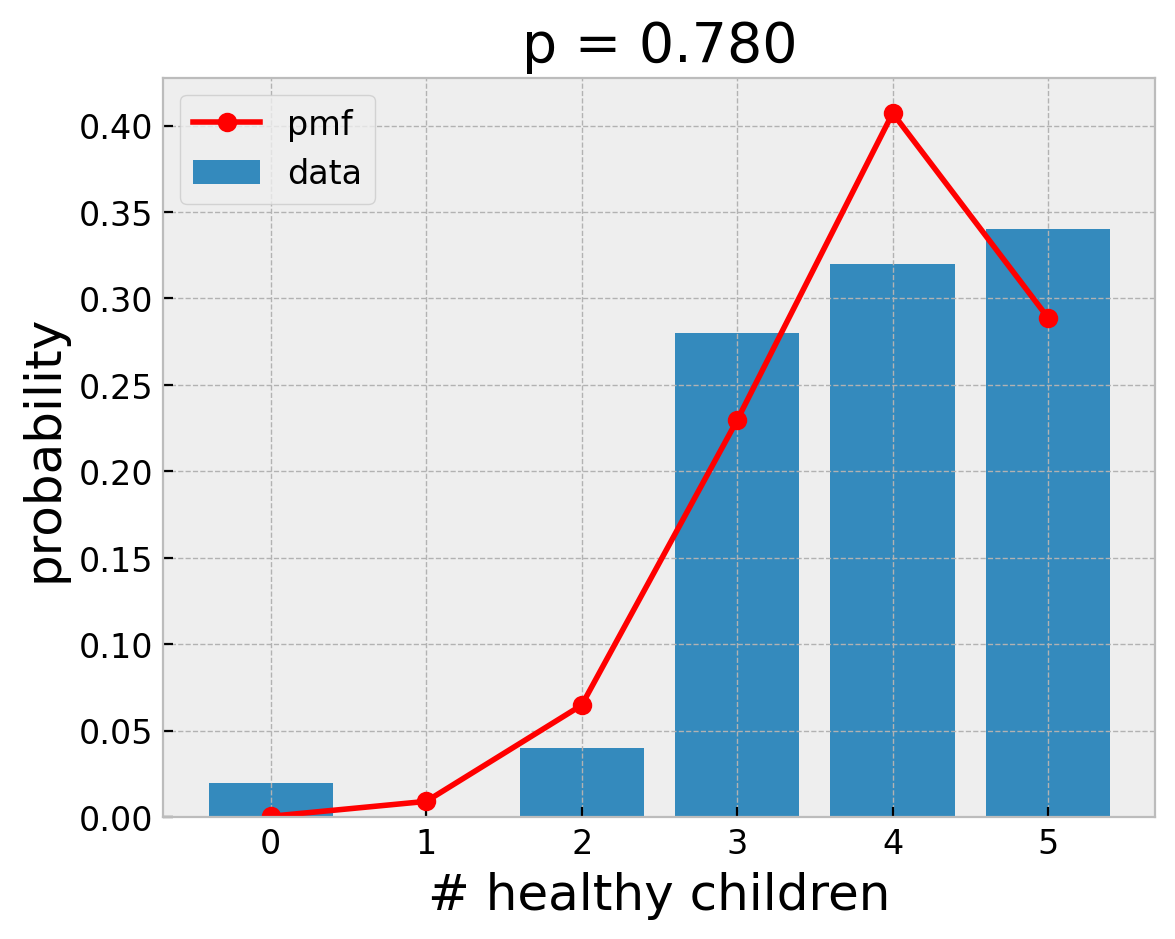

In [57]:
estimated_pmf = st.binom.pmf(n_children, n, estimated_p)

plt.bar(n_children, counts / len(data), label='data')
plt.plot(n_children, estimated_pmf, 'o-', c='r', label='pmf')
plt.xlabel('# healthy children')
plt.ylabel('probability')
plt.title(f'p = {estimated_p :.3f}')
plt.legend();